0.772488513494


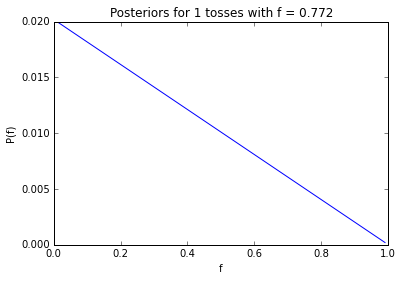

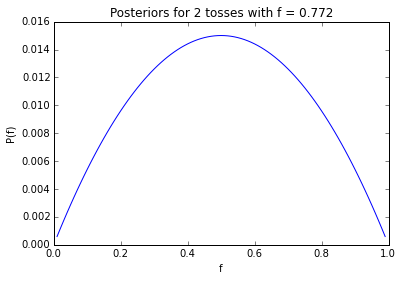

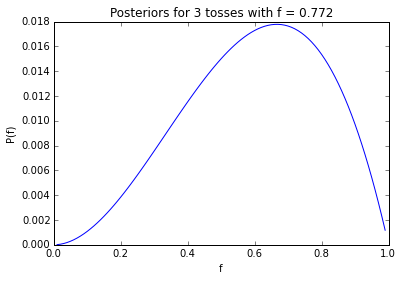

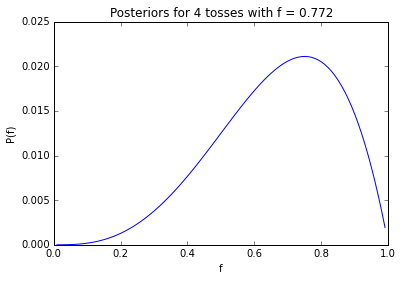

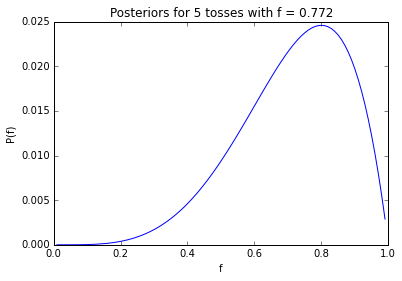

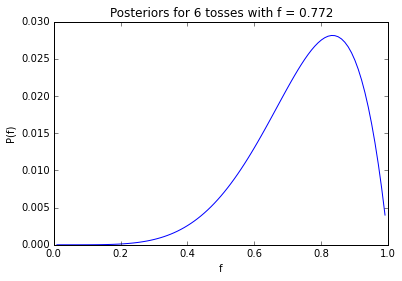

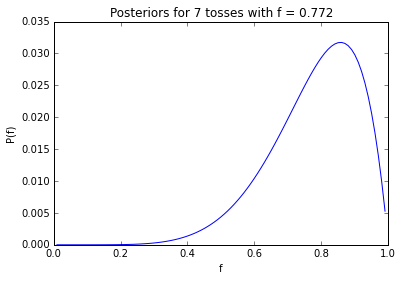

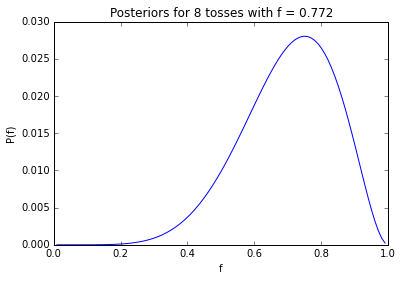

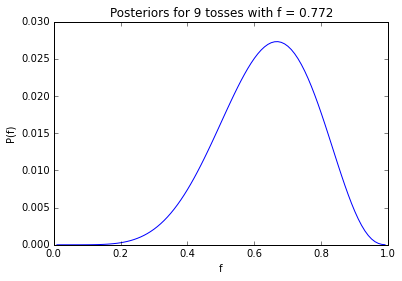

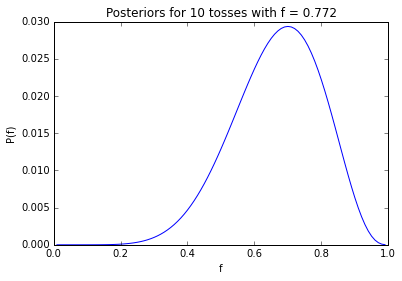

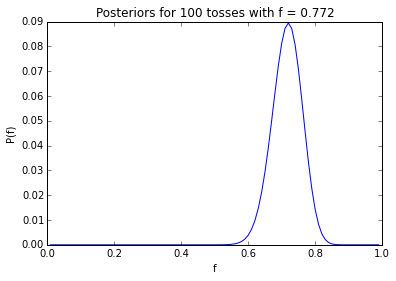

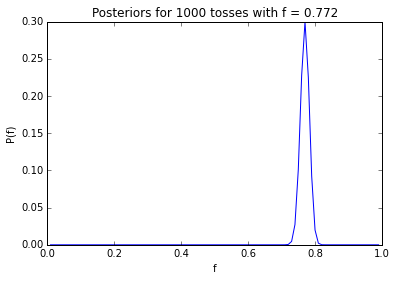

In [68]:
# Joshua G. A. Cashaback; October 21st, 2014.
# Notes and Conjugate Bayes updating based from Paul L. Gribble's, Statistics for Neuroscience Graduate Class, Lesson: Bayesian Approaches I

from pylab import *
import numpy as np
import os, math, operator, random, csv, scipy
from scipy import special

bias = random.random()
print 1-bias
n = 1000
random1 = [1 if random.random() >= bias else 0 for _ in range(n)]

#-----------------------------------------------------------------------------------------------------------------------------------------
# NUMERICAL - To calculate the posterior, multiply the binomial likelihood function by some prior (e.g. Beta distribution) and normalize.
#-----------------------------------------------------------------------------------------------------------------------------------------
# Numerical 1a
# Likelihood = L(p|n,y) = binomial(n k) p ** k * (1-p) ** (n - k); n = number of flips, y = number of heads, and 0 <= p <= 1.

# define prior
alpha0 = 1.
beta0 = 1.
bprior0 = []
for x in np.arange(0.01,1.00,.01):
	bprior1 = 1. / scipy.special.beta(alpha0, beta0) * x ** (alpha0 - 1) * (1 - x) ** (beta0 - 1)
	bprior0.append(bprior1)


bprior0 = np.array(bprior0) / len(bprior0)

# update prior based on new data
for i in np.arange(0,1000,1):
	likelihood0 = []
	n, k = 1, random1[i]
	for p in np.arange(0.01,1.00,.01):
		likelihood1 = scipy.special.binom(n, k) * p ** (k) * (1 - p) ** (n - k)
		likelihood0.append(likelihood1)
	likelihood0 = np.array(likelihood0)
	posterior = (likelihood0 * bprior0) / np.sum(likelihood0 * bprior0)
	if i in [0,1,2,3,4,5,6,7,8,9,99,999]:
		plt.xlabel('f')
		plt.ylabel('P(f)')
		plt.title('Posteriors for ' + str(i+1) + ' tosses with f = ' + str(round(1-bias,3)))
		plot(xaxis, posterior)
		show()
	bprior0 = posterior

In [ ]:
__author__ = 'alex'

from ete2 import Tree
from collections import defaultdict
import numpy as np
from numpy import log

Input = open('simple_tests/4taxon_seqln10_1.nex').read().splitlines()
S = {}
T = []
freq = {}

for line in Input:
    if '\'' in line:
        line = line.split(' ')
        S[line[0].strip('\'')] = line[-1]
    elif '=' in line:
        T.append(line.split('=')[-1].strip())

s_all = ''.join(S) # join all sequences to determine the frequencies
total_len = float(len(s_all))
freq['A'] = s_all.count('A')/total_len
freq['C'] = s_all.count('C')/total_len
freq['G'] = s_all.count('G')/total_len
freq['T'] = s_all.count('T')/total_len

def Felsenstein(node, residue):
    return 0.002

for t in T:
    root = Tree(t)
    for residue in S:
        #Felsenstein(root, residue)

In [ ]:
from ete2 import Tree

tree = Tree('simple_tests/sample.nex') # newick subformat 1 to read internal node names
print tree.children[0].children[0].dist
print tree.children[0].children[1].dist
print tree.children[1].dist
print tree.children[2].dist
tree.write(format=1)

In [161]:
tree1 = '((D:0.43393,B:0.39988):0.00000,C:0.44971,A:0.00000);'
tree2 = '((D:0.20196,B:0.18845):0.09048,C:0.39382,A:0.00006);'
tree3 = '(B:0.38975,(D:0.11069,C:0.32494):0.10444,A:0.00006);'
tree4 = '(D:0.50931,(B:0.19093,C:0.57057):0.08352,A:0.00006);'
tree5 = '((A:0.1,C:0.1):0.5,(B:0.1,D:0.1):0.5);'
T = Tree(tree1)
T.children[1].get_ancestors()[0].show()

In [11]:
T = Tree('((A:0.2,B:0.5):0.1,(C:0.3,D:0.4):0.3);')
T.children[1].children[0]

[]